<a href="https://colab.research.google.com/github/BirundhaManokar/CodeAlpha/blob/main/CodeAlpha_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using Colab cache for faster access to the 'unemployment-in-india' dataset.
Columns in dataset: ['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)', 'Area']
Detected date column: Date
           Region       Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh 2019-05-31   Monthly                             3.65   
1  Andhra Pradesh 2019-06-30   Monthly                             3.05   
2  Andhra Pradesh 2019-07-31   Monthly                             3.75   
3  Andhra Pradesh 2019-08-31   Monthly                             3.32   
4  Andhra Pradesh 2019-09-30   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0          11999139.0                                    43.24  Rural  
1          11755881.0                                    42.05  Rural  
2          12086707.0                                    43.50  R

/tmp/ipython-input-2169056940.py:41: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[date_col] = pd.to_datetime(df[date_col], errors='coerce')


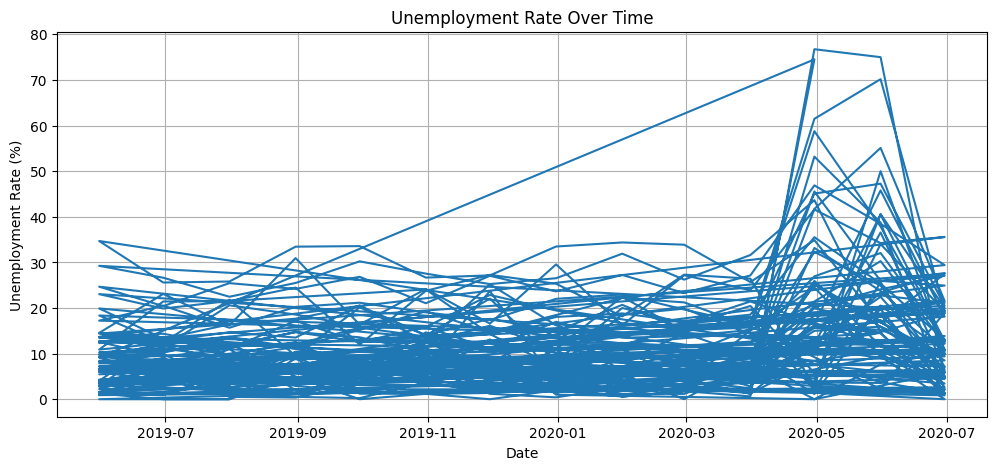

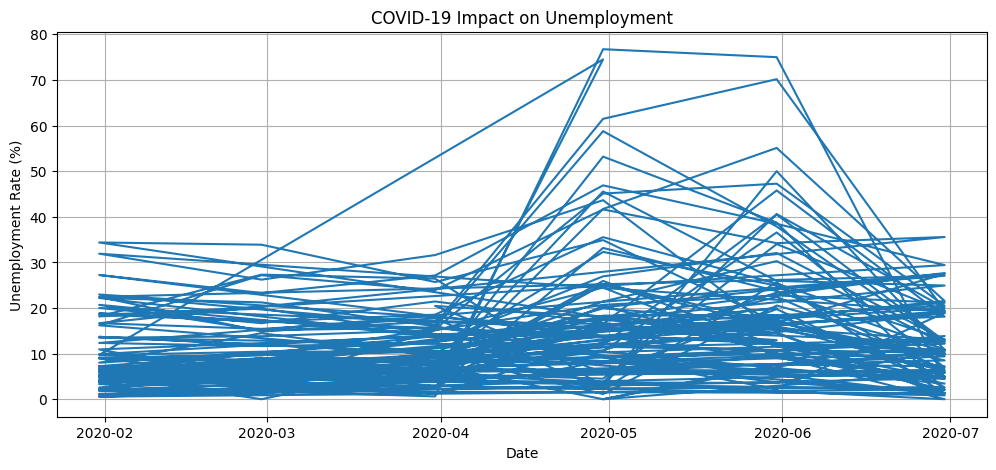


Avg Before COVID: 9.399046511627906
Avg During COVID: 15.10158064516129


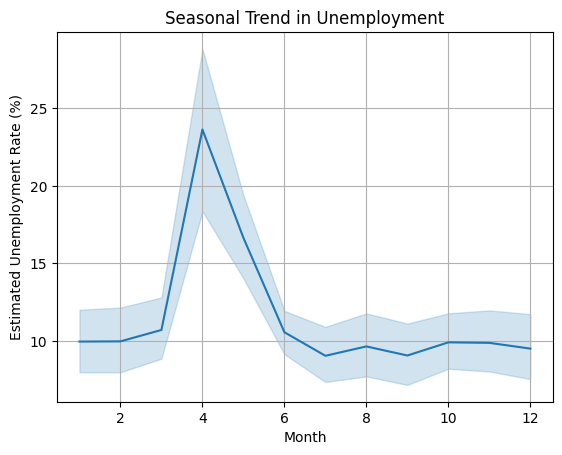

In [ ]:


import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download dataset
path = kagglehub.dataset_download("gokulrajkmv/unemployment-in-india")

# Find CSV file
csv_file = None
for file in os.listdir(path):
    if file.endswith(".csv"):
        csv_file = os.path.join(path, file)

df = pd.read_csv(csv_file)

print("Columns in dataset:", df.columns.tolist())

# ----------------------------------------------------------
# 1. FIX DATE COLUMN AUTOMATICALLY
# ----------------------------------------------------------

# Remove leading/trailing spaces
df.columns = df.columns.str.strip()

# Auto detect date-like column
date_col = None
for col in df.columns:
    if ("date" in col.lower()) or ("time" in col.lower()):
        date_col = col
        break

if date_col is None:
    raise KeyError("No date or time column found! Dataset columns: " + str(df.columns.tolist()))

print("Detected date column:", date_col)

# Convert to datetime
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=[date_col])

# Rename for consistency
df = df.rename(columns={date_col: "Date"})

# ----------------------------------------------------------
# 2. CLEANING
# ----------------------------------------------------------

df = df.drop_duplicates()
num_cols = df.select_dtypes(include=['float64','int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# ----------------------------------------------------------
# 3. EXPLORATION
# ----------------------------------------------------------

print(df.head())
print(df.describe())

rate_col = "Estimated Unemployment Rate (%)"

plt.figure(figsize=(12,5))
plt.plot(df['Date'], df[rate_col])
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate Over Time")
plt.grid(True)
plt.show()

# ----------------------------------------------------------
# 4. COVID IMPACT
# ----------------------------------------------------------

covid_df = df[(df['Date'] >= "2020-01-01") & (df['Date'] <= "2021-12-31")]

plt.figure(figsize=(12,5))
plt.plot(covid_df['Date'], covid_df[rate_col])
plt.title("COVID-19 Impact on Unemployment")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.show()

print("\nAvg Before COVID:", df[df['Date'] < "2020-01-01"][rate_col].mean())
print("Avg During COVID:", covid_df[rate_col].mean())

# ----------------------------------------------------------
# 5. SEASONAL TRENDS
# ----------------------------------------------------------

df['Month'] = df['Date'].dt.month

sns.lineplot(x='Month', y=rate_col, data=df)
plt.title("Seasonal Trend in Unemployment")
plt.grid(True)
plt.show()